# Homework 1 - CSCI 7000
## Behzod Mirpochoev

### Problem 1

In [1]:
import matplotlib.pyplot as plt

In [2]:
def SIR_simulation(N, S, I, R, beta, gamma, time):

    S = [999]
    I = [1]
    R = [0]
    dt = 0.01
    timesteps = int(time/dt)

    for _ in range(1,timesteps): 

        S.append(S[-1] + dt * -(beta * S[-1] * I[-1] / N))
        I.append(I[-1] + dt * ((beta * S[-2] * I[-1] / N) - (gamma * I[-1])))
        R.append(N - (S[-2] + I[-2]))

    plt.plot(range(timesteps), S, color = 'blue', label = 'S Behzod')
    plt.plot(range(timesteps), I, color = 'red', label = 'I Behzod')
    plt.plot(range(timesteps), R, color = 'black', label = 'R Behzod')
    plt.xlabel('time')
    plt.ylabel('people')
    plt.title(r'$\beta$ = {}, $\gamma$ = {}'.format(beta, gamma))
    xticks= [tick * dt for tick in plt.xticks()[0]]
    plt.xticks(plt.xticks()[0], ['{:.0f}'.format(tick) for tick in xticks])
    plt.xlim(0,timesteps)
    plt.legend()
    
    plt.show()

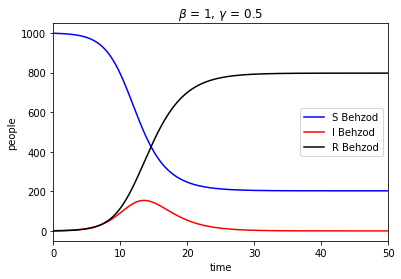

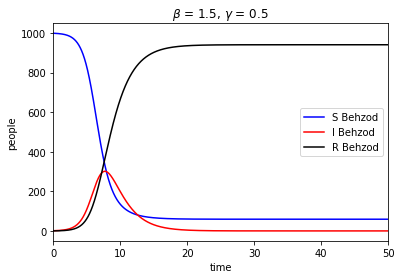

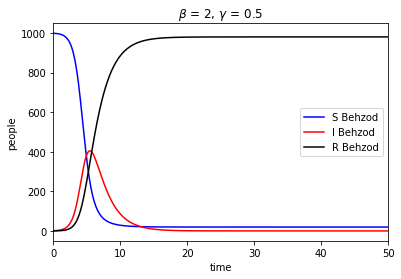

In [3]:
SIR_simulation(N = 1000, S = 999, I = 1, R = 0, beta = 1, gamma = 0.5, time = 50)
SIR_simulation(N = 1000, S = 999, I = 1, R = 0, beta = 1.5, gamma = 0.5, time = 50)
SIR_simulation(N = 1000, S = 999, I = 1, R = 0, beta = 2, gamma = 0.5, time = 50)